# Installing dependencies and importing libraries

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.8 MB/s eta 0:00:00


In [ ]:
import torch
import re
import transformers
import sklearn

import torch.nn as nn
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader

np.random.seed(42)
torch.manual_seed(42)

# Loading the data

In [ ]:
drive.mount("/content/drive")
df = pd.read_csv('/content/drive/MyDrive/T2-IA/data/tweets-rotulados.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,text,sentiment
0,"@anystallion @jonxstt e mesmo assim, os solos ...",Positive
1,Queria ter uma amg q nem a Anitta q paga todo ...,Positive
2,@itaniitta igual anitta nunca será karol g ou ...,Positive
3,@Rafaelnirrer @worldgyeom @iBlogueirinha rlx c...,Negative
4,@selenapuzzy @homem_meiobicha @envxlver @isiss...,Positive
...,...,...
583,o quão lgbt cult br 🇧🇷 você é?\n\nAlcione ✅\nA...,Positive
584,o quão lgbt cult br 🇧🇷 você é? \n\nAlcione ❌️\...,Positive
585,o quão lgbt cult br 🇧🇷 você é?\n\nAlcione ❌️\n...,Negative
586,@szasession @DailyChartBR no dia que ela fizer...,Positive


In [ ]:
df['sentiment'].value_counts()

Positive    294
Negative    294
Name: sentiment, dtype: int64

# Cleaning the data

In [ ]:
def clean_data(tweet):
  # Converting all letters to lowercase
  tweet = tweet.lower()

  # Removing unwanted characters
  tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
  tweet = re.sub(r'#', '', tweet)
  tweet = re.sub(r'https?:\/\/\S+', '', tweet)
  tweet = re.sub(r'[^\w\s]', '', tweet)
  tweet = re.sub(r'\n', '', tweet)

  return tweet

In [ ]:
# Applying clean_data() to all tweets in the df
for i in range(len(df['text'])):
  df['text'][i] = clean_data(df['text'][i])

In [ ]:
# Converting "Positive" and "Negative" classes to 0 and 1
for i in range(len(df.sentiment)):
  if df.sentiment[i] == 'Positive':
    df.sentiment[i] = 0
  elif df.sentiment[i] == 'Negative':
    df.sentiment[i] = 1

In [ ]:
df

,text,sentiment
0,e mesmo assim os solos da anitta tem mais st...,0
1,queria ter uma amg q nem a anitta q paga todo ...,0
2,igual anitta nunca será karol g ou rosalia,0
3,rlx cara a anitta nem sabe que tu existe el...,1
4,_meiobicha vocês vivem se metendo nas publ...,0
...,...,...
583,o quão lgbt cult br você éalcione anitta ludm...,0
584,o quão lgbt cult br você é alcione anitta lud...,0
585,o quão lgbt cult br você éalcione anitta ludm...,1
586,no dia que ela fizer o que a anitta já fez v...,0


# Splitting data into training, testing, and validation

In [ ]:
# 70% of the data for training
# 20% of the data for validation
# 10% of the data for testing

ds_train, ds_test = train_test_split(df, test_size = 0.3, random_state = 42, shuffle = True, stratify = df.sentiment)
ds_test, ds_val = train_test_split(ds_test, test_size = 0.66, random_state = 42, shuffle = True, stratify = ds_test.sentiment)

In [ ]:
ds_train

,text,sentiment
118,amo dar hate na anitta no twitter e dar stream...,0
360,vindo da anitta nem surpreende mais,1
223,kinga demais,0
74,inspiração da anitta kakakak,0
519,só acharia engraçado a xuxa desmentir kkkmas...,0
...,...,...
345,anitta tem mil defeitos mas o povo força cad...,1
172,não me surpreende pan é só os desse naipe que...,1
344,o tipo de gnt que a anitta da palco,1
271,acho que o remix de ta ok vai ser feat maluma ...,0


In [ ]:
print(ds_train.sentiment.value_counts())

1    206
0    205
Name: sentiment, dtype: int64


In [ ]:
ds_test

,text,sentiment
94,tô cheia de aula pra revisar mas tô aqui no ti...,0
481,não aceitei quero um ft dela com a anitta,0
303,a anitta deu fama pra esse aí infelizmente o...,1
219,se até a anitta pode ser famosa qualquer um c...,1
573,tá triste por macho escuta as música antiga da...,0
556,inteligência artificial sem credibilidade alg...,0
446,um beijo da anitta,0
206,nos queremos muito vi no youtube cara,0
46,se for por isso sou mais que você já que ac...,0
132,pega os tweets q vc da rt e curte e pega os...,0


In [ ]:
print(ds_test.sentiment.value_counts())

0    30
1    30
Name: sentiment, dtype: int64


In [ ]:
ds_val

,text,sentiment
99,cara acha q eh um deus só pq anitta mamou ele ...,1
542,tava vendo aki e eu acho engracado a anitta te...,1
364,e vocês esperavam o que de um amigo da anitta,1
44,ih duvido mó cara de quem gosta de barbudo,1
59,a anitta deve ter ego ferido com a karol g até...,1
...,...,...
187,e a anitta nem mamou ele se manca rapaz,1
150,amor vc n é a anitta,0
50,a fala sério a gente tava muito capa álbum da ...,0
386,o pessoal vai atacar ele mas ele tá certíssim...,0


In [ ]:
print(ds_val.sentiment.value_counts())

0    59
1    58
Name: sentiment, dtype: int64


# Dataloader

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

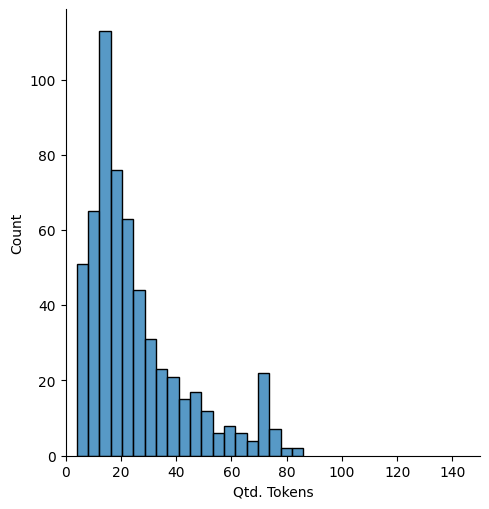

In [ ]:
# Checking the maximum number of tokens to use in the Dataset class

token_lengths = []

for tweet in df.text:
  token = tokenizer.encode(tweet, truncation = True, max_length = 512)
  token_lengths.append(len(token))

sns.displot(token_lengths)

plt.xlim([0, 150]);
plt.xlabel('Qtd. Tokens');

In [ ]:
class TweetDataset(Dataset):
  def __init__(self, tweets, sentiments, tokenizer):
    self.tweets = tweets
    self.sentiments = sentiments
    self.tokenizer = tokenizer
    self.max_len = 100

  def __getitem__(self, index):
    tweet = self.tweets[index]
    sentiment = self.sentiments[index]

    token = tokenizer(
      tweet,
      max_length = self.max_len,
      add_special_tokens = True,
      return_token_type_ids = False,
      padding = 'max_length',
      return_attention_mask = True,
      return_tensors = 'pt',
    )

    return {
        'text' : tweet,
        'input_ids': token['input_ids'].flatten(),
        'attention_mask': token['attention_mask'].flatten(),
        'sentiment': torch.tensor(sentiment, dtype=torch.long)
    }

  def __len__(self):
    return len(self.tweets)

In [ ]:
BATCH_SIZE = 4

In [ ]:
def dataloader(tweets, tokenizer):
  dataset = TweetDataset(
      tweets.text.to_numpy(),
      tweets.sentiment.to_numpy(),
      tokenizer
  )

  return DataLoader(
      dataset,
      batch_size = BATCH_SIZE
  )

In [ ]:
dl_train = dataloader(ds_train, tokenizer)
dl_test = dataloader(ds_test, tokenizer)
dl_val = dataloader(ds_val, tokenizer)

# Model

In [ ]:
NUM_CLASSES = 2
DROPOUT_RATE = 0.3

In [ ]:
class BertClassifier(nn.Module):
  def __init__(self):
    super(BertClassifier, self).__init__()
    self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
    self.drop = nn.Dropout(p = DROPOUT_RATE)
    self.out = nn.Linear(self.bert.config.hidden_size, NUM_CLASSES)


  def forward(self, input_ids, attention_mask):
    _, output = self.bert(input_ids, attention_mask, return_dict = False)
    output = self.drop(output)

    return self.out(output)

In [ ]:
EPOCHS = 100

In [ ]:
model = BertClassifier()
model = model.to(device)

opt = torch.optim.AdamW(model.parameters(), lr = 1e-6)

total_steps = len(dl_train) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  opt,
  num_warmup_steps = 0,
  num_training_steps = total_steps
)

loss_f = nn.CrossEntropyLoss().to(device)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def train_epoch(model, dataloader, loss_f, opt, scheduler, len_ds):
  model = model.train()

  correct_preds = 0
  losses = []


  for batch in dataloader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    sentiments = batch['sentiment'].to(device)

    outputs = model(input_ids, attention_mask)

    _, preds = torch.max(outputs, dim = 1)

    loss = loss_f(outputs, sentiments)

    correct_preds += torch.sum(preds == sentiments)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm = 1.0)
    opt.step()
    scheduler.step()
    opt.zero_grad()

  return correct_preds / len_ds, np.mean(losses)

In [ ]:
def evaluation(model, dataloader, loss_f, len_ds):
  model = model.eval()

  correct_preds = 0
  losses = []

  with torch.no_grad():
    for batch in dataloader:
      input_ids = batch["input_ids"].to(device)
      attention_mask = batch["attention_mask"].to(device)
      sentiments = batch["sentiment"].to(device)

      outputs = model(input_ids, attention_mask)

      _, preds = torch.max(outputs, dim = 1)

      loss = loss_f(outputs, sentiments)

      correct_preds += torch.sum(preds == sentiments)
      losses.append(loss.item())

  return correct_preds / len_ds, np.mean(losses)

# Train

In [ ]:
train_acc_list = []
train_loss_list = []

val_acc_list = []
val_loss_list = []

best_acc = 0

early_stop = False
last_val_loss = 100

for epoch in range(EPOCHS):
  print("Epoch %d/%d" % (epoch + 1, EPOCHS))

  train_acc, train_loss = train_epoch(
    model,
    dl_train,
    loss_f,
    opt,
    scheduler,
    len(ds_train)
  )

  print("Train Loss:      %.4f , Train Accuracy:      %.4f" % (train_loss, train_acc))

  val_acc, val_loss = evaluation(
    model,
    dl_val,
    loss_f,
    len(ds_val)
  )

  print("Validation Loss: %.4f , Validation Accuracy: %.4f" % (val_loss, val_acc))
  print("=" * 60)
  print()

  if val_loss > last_val_loss:
    early_stop = True

  if early_stop:
    print("O treinamento foi encerrado pois o modelo começou a overfittar.")
    break

  last_val_loss = val_loss

  train_acc_list.append(train_acc)
  train_loss_list.append(train_loss)
  val_acc_list.append(val_acc)
  val_loss_list.append(val_loss)

  if val_acc > best_acc:
    torch.save(model.state_dict(), '/content/drive/MyDrive/T2-IA/model/model.pth')
    best_acc = val_acc

Epoch 1/100
Train Loss:      0.6998 , Train Accuracy:      0.5036
Validation Loss: 0.6988 , Validation Accuracy: 0.4786

Epoch 2/100
Train Loss:      0.6976 , Train Accuracy:      0.5158
Validation Loss: 0.6950 , Validation Accuracy: 0.5128

Epoch 3/100
Train Loss:      0.6925 , Train Accuracy:      0.5255
Validation Loss: 0.6923 , Validation Accuracy: 0.5299

Epoch 4/100
Train Loss:      0.6860 , Train Accuracy:      0.5766
Validation Loss: 0.6866 , Validation Accuracy: 0.6068

Epoch 5/100
Train Loss:      0.6767 , Train Accuracy:      0.5985
Validation Loss: 0.6862 , Validation Accuracy: 0.6154

Epoch 6/100
Train Loss:      0.6733 , Train Accuracy:      0.6083
Validation Loss: 0.6782 , Validation Accuracy: 0.6068

Epoch 7/100
Train Loss:      0.6580 , Train Accuracy:      0.6326
Validation Loss: 0.6676 , Validation Accuracy: 0.6239

Epoch 8/100
Train Loss:      0.6441 , Train Accuracy:      0.6496
Validation Loss: 0.6579 , Validation Accuracy: 0.6410

Epoch 9/100
Train Loss:      0.6

# Loss and Accuracy Graphs

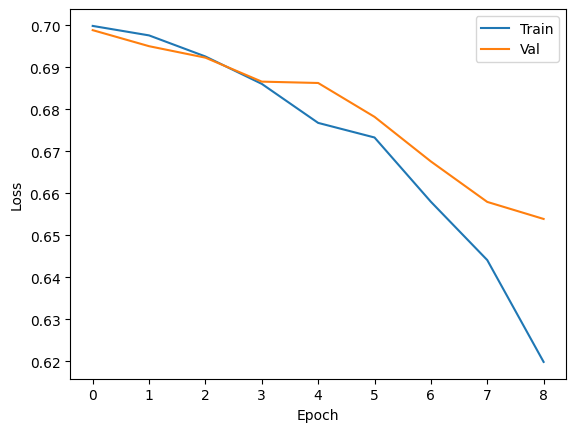

In [ ]:
plt.plot(train_loss_list, label = "Train")
plt.plot(val_loss_list, label = "Val")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

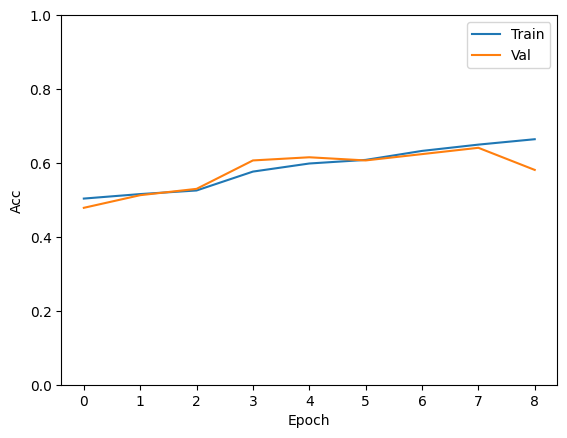

In [ ]:
train_acc_list1 = [acc.cpu().numpy() for acc in train_acc_list]
val_acc_list1 = [acc.cpu().numpy() for acc in val_acc_list]

plt.ylim([0, 1]);
plt.plot(train_acc_list1, label = "Train")
plt.plot(val_acc_list1, label = "Val")
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Classification Report

In [ ]:
def predictions(model, dataloader):
  model = model.eval()

  tweets = []
  predictions = []
  prediction_probabilities = []
  real_values = []

  with torch.no_grad():
    for batch in dataloader:
      tweets = batch["text"]
      input_ids = batch["input_ids"].to(device)
      attention_mask = batch["attention_mask"].to(device)
      sentiments = batch["sentiment"].to(device)

      outputs = model(
        input_ids = input_ids,
        attention_mask = attention_mask
      )
      _, preds = torch.max(outputs, dim = 1)

      probs = F.softmax(outputs, dim = 1)

      tweets.extend(tweets)
      predictions.extend(preds)
      prediction_probabilities.extend(probs)
      real_values.extend(sentiments)

  predictions = torch.stack(predictions).cpu()
  prediction_probabilities = torch.stack(prediction_probabilities).cpu()
  real_values = torch.stack(real_values).cpu()

  return tweets, predictions, prediction_probabilities, real_values

In [ ]:
MODEL_PATH = "/content/drive/MyDrive/T2-IA/model/model.pth"

saved_model = BertClassifier();
saved_model.load_state_dict(torch.load(MODEL_PATH, map_location=torch.device('cpu')))
saved_model.to(device)

y_tweets, y_pred, y_pred_probs, y_test = predictions(
  saved_model,
  dl_test
)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
print(classification_report(y_test, y_pred, target_names = ['Positive', 'Negative']))

              precision    recall  f1-score   support

    Positive       0.69      0.67      0.68        30
    Negative       0.68      0.70      0.69        30

    accuracy                           0.68        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.68      0.68      0.68        60



# Confusion Matrix

In [ ]:
def create_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot = True, fmt = "d", cmap = "Greens")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation = 30, ha = 'right')
  plt.ylabel('Sentiment')
  plt.xlabel('Prediction');

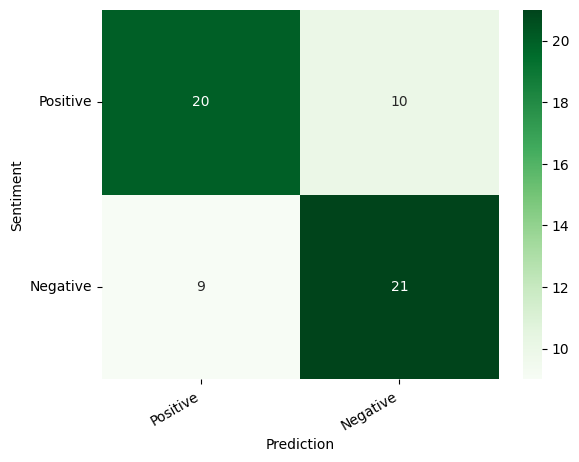

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = ['Positive', 'Negative'], columns = ['Positive', 'Negative'])

create_confusion_matrix(df_cm)